In [1]:
import sys; sys.path.insert(0, '..')
from dot_plots import *
import Merge_Cartesian as MC


%matplotlib widget
plt.rcParams["figure.figsize"] = (7, 7)

In [2]:
TL : str = '0.7'
TC : str = '0.5'

ZL = '10'
ZC = '1'

number_periods = 2

Inductor_List =    [ZL   ,TL  ,'1']
Capacitor_List =   [ZC   ,TC  ,'1']
Circuit_List =   ['1'      , number_periods, False, '12']
(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)

(<AxesSubplot:title={'center':'Time Fanout Diagram for 8 Layers\n TL = 0.7s and TC = 0.5s'}, xlabel='Layer Number'>,
 <Figure size 700x700 with 1 Axes>)

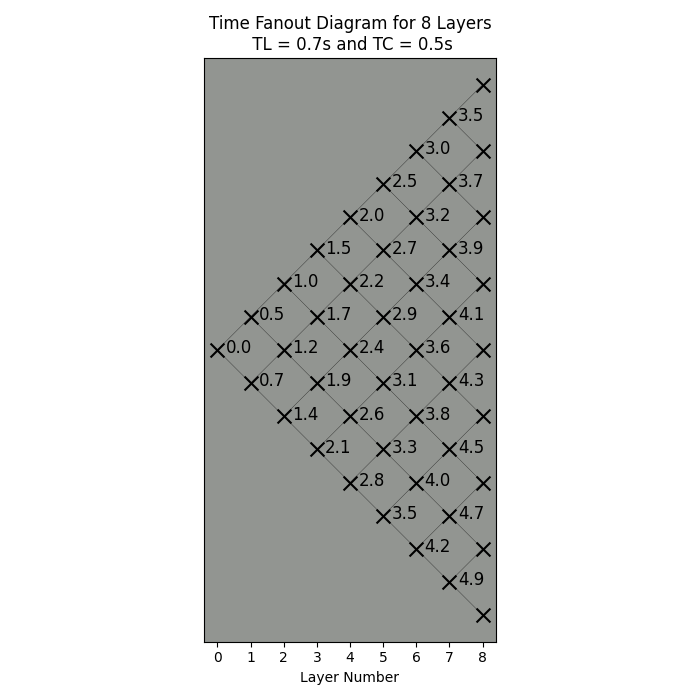

In [3]:
layers : int = 8

plot_time(TL,TC,layers,
          plot_time_delays =True, plot_colours = False,
          mark_nodes = True)

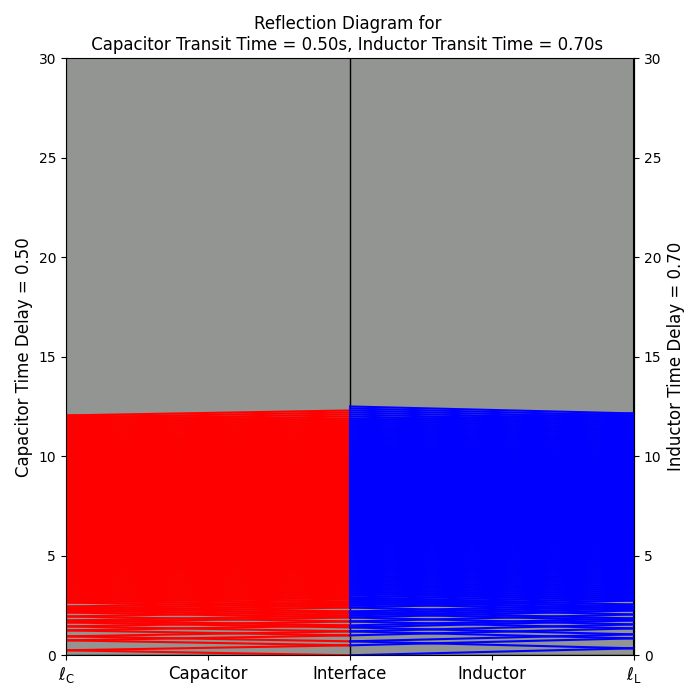

In [4]:
fig_reflection, ax_reflection = plt.subplots()

MC.plot_refelction_diagram(data_input,data_output_ordered,30,ax_reflection,False)

In [5]:
data_input.LCM - Decimal('17')

Decimal('-13.500')

In [23]:
def gcd_euclid_bezout(num_big:Decimal,num_small:Decimal):

    num_big_original = num_big
    num_small_original = num_small
    
    num_big_numerator,num_big_denomenator = num_big.as_integer_ratio()
    num_small_numerator, num_small_denomenator = num_small.as_integer_ratio()
    
    common_den = Decimal(str(num_big_denomenator ))* Decimal(str(num_small_denomenator))
    
    num_big = num_big_numerator * num_small_denomenator
    num_small = num_small_numerator * num_big_denomenator
    
    equations = []
    
    # initialize 
    multiplier, remainder = divmod(num_big,num_small)
    equations.append(dict([('num_big',num_big),('mul_small',multiplier),('num_small',num_small),('remainder',remainder)]))
    
    while remainder != 0:
        num_big = num_small
        num_small = remainder
        
        multiplier, remainder = divmod(num_big,num_small)
        equations.append(dict([('num_big',num_big),('mul_small',multiplier),('num_small',num_small),('remainder',remainder)]))
        
    GCD_big = num_small
    GCD = GCD_big/common_den
    LCM = num_big_original * num_small_original/(GCD)
    
    K_big = num_small_original/GCD
    K_small = num_big_original/GCD
    
    Factor_dict = dict([('K_big',K_big),('num_big',num_big_original),
                        ('K_small',K_small),('num_small',num_small_original),
                        ('GCD',GCD),('LCM',LCM)])
    
    def make_reverse_format (eq):
        new = dict([('mul_big',1),
                        ('num_big' , eq['num_big']),
                        ('mul_small' , eq['mul_small']*-1),
                        ('num_small' , eq['num_small'])
                        ])
        return new
        
    def apply_next_equation (start_eq, next_eq):
        next_eq = make_reverse_format(next_eq)
        next_eq['mul_small'] = start_eq['mul_big'] + start_eq['mul_small']*next_eq['mul_small']
        next_eq['mul_big'] = start_eq['mul_small']
        
        return next_eq
    
    reverse_index = len(equations) -2 
    
    start_equation = make_reverse_format(equations[reverse_index])
    reverse_index -= 1

    while reverse_index != -1:
        start_equation = apply_next_equation(start_equation,equations[reverse_index])
        reverse_index -= 1
    
    print(f'Euclidean algorithm completed \n {K_big} x {num_big_original} = {K_small} x {num_small_original} = {LCM}, GCD = {GCD}')
    print(f'Bezout analysis completed \n {start_equation["mul_big"]} x {num_big_original} + {start_equation["mul_small"]} x {num_small_original} = {GCD}')
    new_big_mul = 0
    new_small_mull = 0
    if start_equation["mul_big"] > 0:
        new_big_mul  = start_equation["mul_big"] - K_big
        new_small_mull = start_equation["mul_small"] + K_small
    else:
        new_big_mul  = start_equation["mul_big"] + K_big
        new_small_mull = start_equation["mul_small"] - K_small
    print(f'{new_big_mul} x {num_big_original} + {new_small_mull} x {num_small_original} = {GCD}')
    
    return Factor_dict, start_equation
    

In [24]:
F,R = gcd_euclid_bezout(Decimal(TL),Decimal(TC))

Euclidean algorithm completed 
 5 x 0.7 = 7 x 0.5 = 3.5, GCD = 0.1
Bezout analysis completed 
 -2 x 0.7 + 3 x 0.5 = 0.1
3 x 0.7 + -4 x 0.5 = 0.1


In [20]:
print(F,R)

{'K_big': Decimal('5'), 'num_big': Decimal('0.7'), 'K_small': Decimal('7'), 'num_small': Decimal('0.5'), 'GCD': Decimal('0.1'), 'LCM': Decimal('3.5')} {'mul_big': -2, 'num_big': 14, 'mul_small': 3, 'num_small': 10}
